[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

# [RQ3] Do the all trips last the same? 

In [54]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import pylab as pyl

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [3]:
trip_duration=[]
for i,df_name in enumerate (df_names):
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=10000)
        #
        trip_duration.append(round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm'),2))
trip_duration=pd.concat(trip_duration)

In [4]:
#chechked if there is inconsistency with trip durations(e.g. negative and zero values) and use only positive values for plotting 
trip_duration[trip_duration<=0].count()

52

In [5]:
trip_duration[trip_duration>0].head()

0     5.77
1    24.65
2     4.22
3     5.93
4     3.53
dtype: float64

In [6]:
trip_duration=trip_duration[trip_duration>0]

In [7]:
len(trip_duration)

59948

In [8]:
mean=trip_duration.mean()
mean

15.563748582104413

In [9]:
std=trip_duration.std()
std

63.480523595094255

In [10]:
#trip_duration_by_minute=trip_duration.apply(lambda x : int(round(x)))

# 5-minute interval

In [11]:
trip_duration_by_5minutes=trip_duration.groupby(pd.cut(trip_duration, np.arange(0, trip_duration.max()+1, 5))).count()
#.resample("5T")

In [12]:
trip_duration_by_5minutes.head(10)

(0.0, 5.0]      11382
(5.0, 10.0]     18401
(10.0, 15.0]    12295
(15.0, 20.0]     7395
(20.0, 25.0]     4286
(25.0, 30.0]     2644
(30.0, 35.0]     1399
(35.0, 40.0]      769
(40.0, 45.0]      454
(45.0, 50.0]      260
dtype: int64

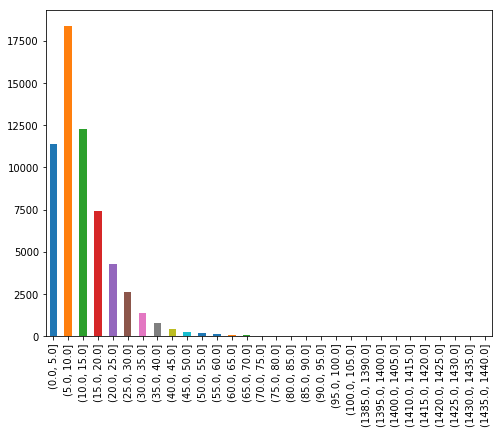

In [13]:
f = plt.figure() 
f.set_figheight(6)
f.set_figwidth(8)
plt.grid(color ='lightgray', linestyle = '-.') 
trip_duration_by_5minutes[trip_duration_by_5minutes>5].plot(kind = 'bar')#,grid=True)
plt.show()

In [45]:
trip_duration

0        5.77
1       24.65
2        4.22
3        5.93
4        3.53
5       13.37
6       28.47
7        1.38
8       20.37
9       15.57
10       9.23
11       6.27
12       1.53
13      10.52
14       8.57
15       5.93
16      17.38
17      10.53
18      27.15
19      26.42
20      20.15
21      12.73
22       7.95
23      23.08
24       1.93
25       8.15
26       3.82
27      11.33
28      13.57
29      10.87
        ...  
9970     6.80
9971    17.33
9972    21.12
9973     8.25
9974     6.07
9975     9.20
9976     5.75
9977    11.38
9978    31.38
9979    43.43
9980     4.95
9981    15.40
9982    16.62
9983    32.98
9984    19.97
9985    20.02
9986     8.57
9987    42.37
9988     2.88
9989    18.00
9990    28.18
9991     6.12
9992    12.45
9993    25.98
9994    13.62
9995    11.57
9996    16.75
9997    10.22
9998    10.60
9999     1.58
Length: 59948, dtype: float64

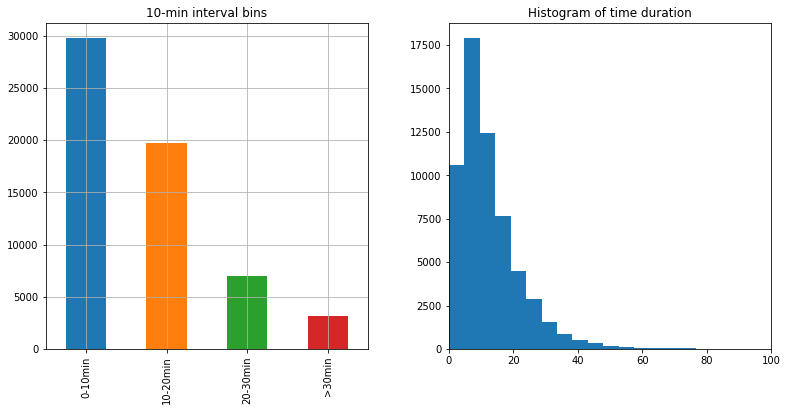

In [68]:
X=trip_duration

f = plt.figure() 
f.set_figheight(6)
f.set_figwidth(13)

plt.subplot(1,2,1)
trip_duration_bins.plot(kind = 'bar',grid=True,title='10-min interval bins')
#plt.xlim(0,100)

pyl.subplots_adjust(wspace=0.25)

pyl.subplot(1,2,2)
pyl.hist(X,bins=300)
pyl.title('Histogram of time duration')
pyl.xlim(0,100)

pyl.show()

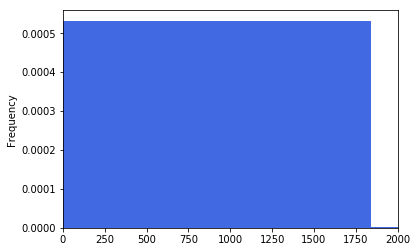

In [15]:
f = plt.figure()
plt.xlim(0,2000)
trip_duration_by_5minutes.plot(kind='hist',color='royalblue',density=True)

# 10-minute interval

In [16]:
def make_bins(x):
    x=int(x)
    if x in range(0,10):
        return '0-10min'
    if x in range(10,20):
        return '10-20min'
    elif x in range(20,30):
        return '20-30min'
    elif x>30:
        return '>30min' 

In [17]:
trip_duration_bins=trip_duration.groupby(trip_duration.apply(make_bins)).count()
trip_duration_bins

0-10min     29730
10-20min    19723
20-30min     6945
>30min       3201
dtype: int64

In [18]:
trip_duration_bins.rename('trip duration')

0-10min     29730
10-20min    19723
20-30min     6945
>30min       3201
Name: trip duration, dtype: int64

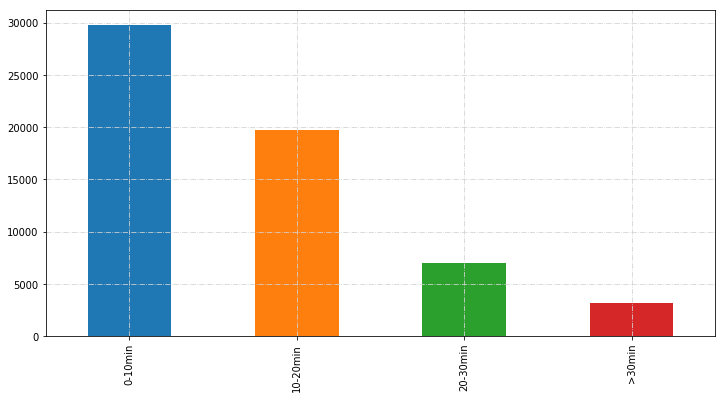

In [19]:
f = plt.figure() 
plt.grid(color ='lightgray', linestyle = '-.') 
f.set_figheight(6)
f.set_figwidth(12) 
trip_duration_bins.plot(kind = 'bar',grid=True)

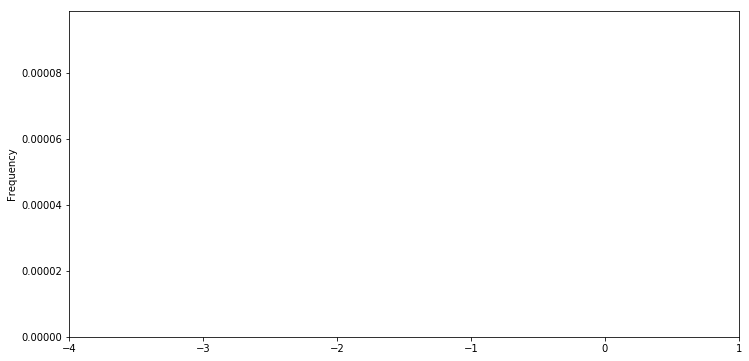

In [20]:
f = plt.figure()
plt.xlim(0-4)
trip_duration_bins.plot(kind='hist',color='royalblue',density=True)
f.set_figheight(6)
f.set_figwidth(12)

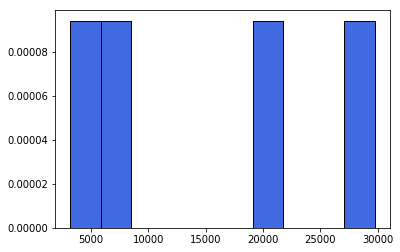

In [21]:
data = trip_duration_bins
#histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(data,edgecolor="black",color='royalblue',histtype='bar',density=True)#,cumulative =True)
plt.show()

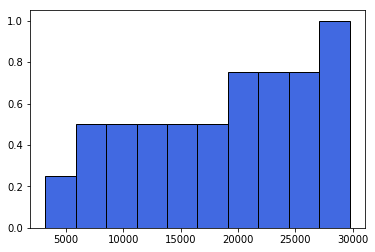

In [22]:
data = trip_duration_bins
#histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(data,edgecolor="black",color='royalblue',histtype='bar',density=True,cumulative=True)
plt.show()

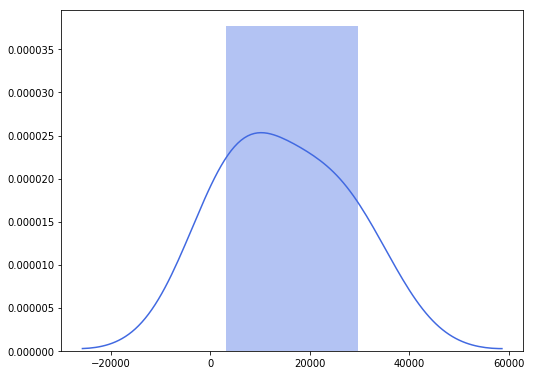

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8.27, 6.27)
ax = sns.distplot(data,hist=True,norm_hist=True,color='royalblue')

In [24]:
#def payments_per_borough(borough_lst):
trip_duration_df=pd.DataFrame()
for i,df_name in enumerate(df_names): #repeating it for every file(aka month) 
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=10000)
        # merging it with taxi_zone_lookup file(left-join) 
        df=pd.merge(df,taxi_zone_lookup,how='left',left_on='PULocationID',right_on='LocationID')
        df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm')
  
        trip_duration_df=trip_duration_df.append(df.loc[:,['trip_duration','Borough']])

In [25]:
trip_duration_df.shape

(60000, 2)

In [26]:
trip_duration_df.head()

,trip_duration,Borough
0,5.766667,Manhattan
1,24.650000,Manhattan
2,4.216667,Manhattan
3,5.933333,Manhattan
4,3.533333,Manhattan


In [27]:
trip_duration_df['trip_duration']=trip_duration_df.trip_duration.apply(make_bins)

In [28]:
trip_duration_df['counter']=1

In [29]:
tp=trip_duration_df.groupby(['Borough','trip_duration']).count()

KeyError: 'the label [EWR] is not in the [index]'

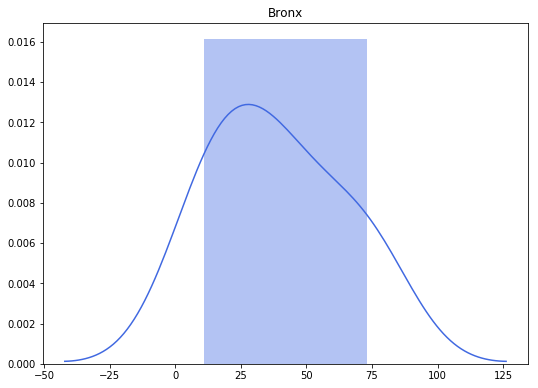

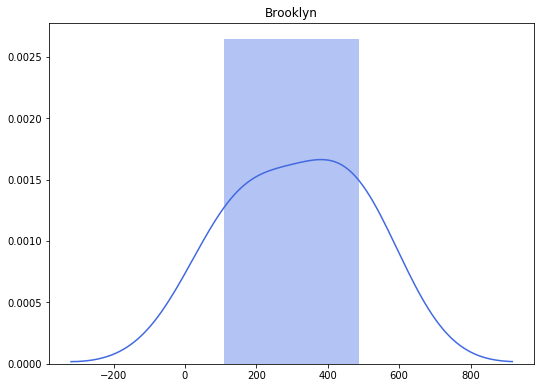

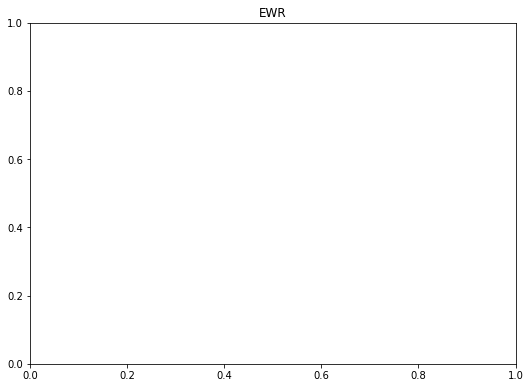

In [30]:
for bor in borough_lst:
    fig, ax = plt.subplots()
    fig.set_size_inches(8.7, 6.27)
    plt.title(bor)
    ax = sns.distplot(tp.loc[bor],hist=True,kde=True,color='royalblue')

## hehe I wish 
